Tomer Kleiner 207459009 https://www.kaggle.com/tomerkleiner <br>
Erez Lavi     209524891 https://www.kaggle.com/erezlavi

# House prices prediction

TL;DR

In this competition, our goal is to make the best prediction about housing prices in the city Ames, lowa by using a linear regression tools we have learned in labs and lectures. Firstly, we'll preprocess, clean the data and visualize it. Then we will divide out dataset with CV and do some feature selection using RFECV. Additionaly, we will use Regularization techniques (Ridge, Lasso, Elastic Net) in the goal of reducing overfitting in our model and get it better and more optimised. and lastly, we will evaluate and submit our results to kaggle.

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import root_mean_squared_error


In [3]:
train_data = pd.read_csv('data/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test_data = pd.read_csv('data/test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Data Cleansing

In [5]:

pd.set_option('display.max_rows', None)
train_data.dtypes.to_frame()

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object


In [6]:
# description of our dataset
#T refers to transpose that displays in long format
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


First off, we'll check for some missing values in the data

In [7]:
def summarize_missing_values(df):
    """
    This function takes a DataFrame as input and returns a summary DataFrame
    that includes the column index, column names, the count of missing values,
    the percentage of missing values, and the data type for each column, but
    only for columns that have missing values. The summary is sorted by the 
    count of missing values in descending order.
    """
    summary = []
    for idx, col in enumerate(df.columns):
        # Calculate total and percentage missing
        total_missing = df[col].isna().sum()
        if total_missing > 0:
            percent_missing = df[col].isna().mean() * 100
            dtype = df[col].dtype
            summary.append([idx, col, total_missing, percent_missing, dtype])

    # Create a DataFrame from the summary list
    summary_df = pd.DataFrame(summary, columns=['Index', 'Column', 'Missing Values', 'Percentage Missing', 'Dtype'])

    # Sort the DataFrame by 'Missing Values' in descending order
    summary_df = summary_df.sort_values(by='Missing Values', ascending=False).reset_index(drop=True)

    return summary_df

def plot_missing_values_summary(df):
    """
    This function takes a DataFrame with missing values summary and creates a 
    heatmap to visualize the percentage of missing values.
    """
    plt.figure(figsize=(20, 6))
    sns.heatmap(df[['Column', 'Percentage Missing']].set_index('Column').transpose(),
                cmap='viridis', annot=True, cbar_kws={'label': 'Percentage Missing'})
    plt.title('Missing Values Percentage by Column')
    plt.show()

## Handle Missing value on train data

    Index        Column  Missing Values  Percentage Missing    Dtype
0      72        PoolQC            1453           99.520548   object
1      74   MiscFeature            1406           96.301370   object
2       6         Alley            1369           93.767123   object
3      73         Fence            1179           80.753425   object
4      25    MasVnrType             872           59.726027   object
5      57   FireplaceQu             690           47.260274   object
6       3   LotFrontage             259           17.739726  float64
7      58    GarageType              81            5.547945   object
8      59   GarageYrBlt              81            5.547945  float64
9      60  GarageFinish              81            5.547945   object
10     63    GarageQual              81            5.547945   object
11     64    GarageCond              81            5.547945   object
12     35  BsmtFinType2              38            2.602740   object
13     32  BsmtExposure           

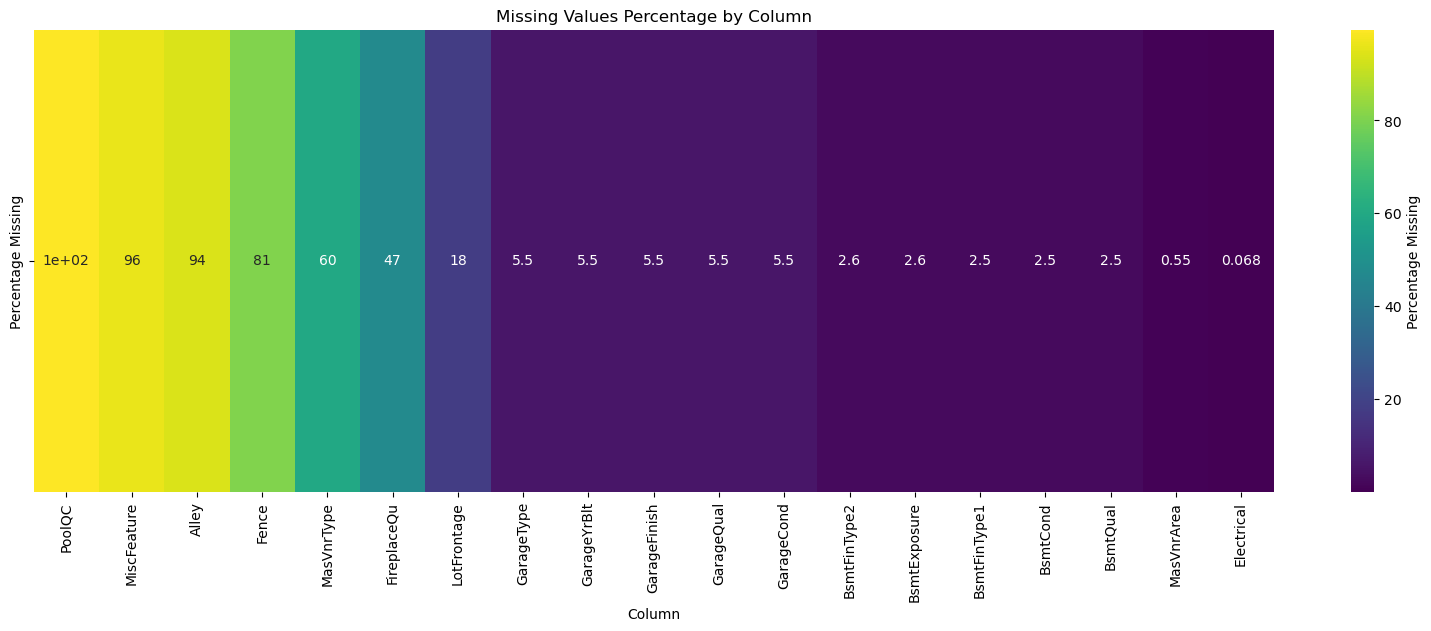

In [8]:
missing_summary = summarize_missing_values(train_data)
print(missing_summary)

plot_missing_values_summary(missing_summary)

Out of the 18 columns with missing values:<br>
Three are numerical features LotFrontage,MasVnrArea and GarageYrBlt<br>
And the rest are categorical features.

Now we can clearly see we have some missing values in the dataset and use that info for better prediction. Our goal is to make an accurate completion of the mising values for some features.

We noticed that the data isn't exactly filled the way it is described, and some categorical features that should have 'NA' are simply empty. 

In [9]:
print(train_data[train_data['MasVnrType'] == 'None'])
print(train_data[train_data['PoolQC'] == 'NA'])
print(train_data[train_data['Fence'] == 'NA'])
print(train_data[train_data['PoolQC'] == 'NA'])


Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]
Empty

We have to fill those manually

In [10]:

fill_features = ['MasVnrType','Alley','Fence','PoolQC']
for col in fill_features:
    train_data[col] = train_data[col].fillna('NA')



Filling train missing numerical data

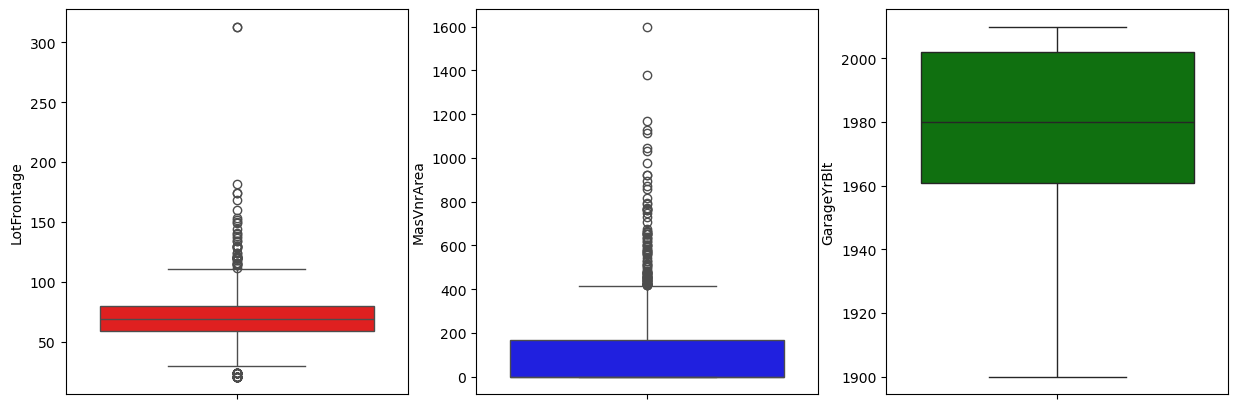

In [11]:
#There's no need of dropping the na values as we have less missing values.
#If there are outliers in these three columns, we can fill them with their median values.
#if not then mean is fine.

plt.figure(figsize=(15,5))

numerical_to_examine = ['LotFrontage','MasVnrArea','GarageYrBlt']
temp = train_data[numerical_to_examine]
colors=['','red','blue','green']
i=1
for col in temp.columns:
    plt.subplot(1,3,i)
    a1 = sns.boxplot(data=temp,y=col,color=colors[i])
    i+=1

There are outliers in those so we will fill them with median values.

In [12]:
#Fill train_data null with median value
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median())
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median())
train_data[numerical_to_examine].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

Now let's examine categorical features

#### 1) Basement

In [13]:
Bsmt_cols = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2']
train_data[Bsmt_cols].mode()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,TA,TA,No,Unf,Unf


In [14]:
train_data[train_data['BsmtQual'].isnull()][Bsmt_cols].head(10)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


We can infer from the above table , that the relevant data is missing because there is no basement in those houses.<br>
While houses that have basements also specify these features, 
We can't fill the missing values with mode values as it might damage the prediction.<br>
We'll fill the missing values with 'NA' instead.

In [15]:
#Fill basement with 'NA'
for col in Bsmt_cols:
    train_data[col] = train_data[col].fillna('NA')

#### 2) Garage

In [16]:
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars', 'GarageArea']
train_data[garage_cols].isna().sum()

GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
GarageCars       0
GarageArea       0
dtype: int64

In [17]:
train_data[train_data['GarageType'].isnull()][garage_cols].head()

,GarageType,GarageFinish,GarageQual,GarageCond,GarageCars,GarageArea
39,NaN,NaN,NaN,NaN,0,0
48,NaN,NaN,NaN,NaN,0,0
78,NaN,NaN,NaN,NaN,0,0
88,NaN,NaN,NaN,NaN,0,0
89,NaN,NaN,NaN,NaN,0,0


We'll simply fill them with 'NA', the same we did with basement.


In [18]:
for col in garage_cols:
    if train_data[col].dtype == 'object':
        train_data[col] = train_data[col].fillna('No Garage')
    else:
        train_data[col] = train_data[col].fillna(0)

#### 3.FirePlace

In [19]:
train_data[train_data['FireplaceQu'].isnull()][['Fireplaces','FireplaceQu']].head()

,Fireplaces,FireplaceQu
0,0,NaN
5,0,NaN
10,0,NaN
12,0,NaN
15,0,NaN


We can see that the missing values are at those places , where number of fireplaces is zero.<br>
we will fill the missing values with 'NA'.

In [20]:
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna('No Fireplace')

In [21]:
#We'll replace electrical with mode (there is only one missing value so mode is fine)
train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])

In [22]:
#Current Missing values count
print('Missing train values:', train_data.isna().sum().sum())

Missing train values: 1406


#### Feature Removal

In [23]:
train_data.drop('Id' , axis =1 , inplace = True)
train_data.drop('MiscFeature', axis =1, inplace = True)
print(f"Training missing values summary:\n{summarize_missing_values(train_data)}")

Training missing values summary:
Empty DataFrame
Columns: [Index, Column, Missing Values, Percentage Missing, Dtype]
Index: []


## Handle Missing value on test data

we'll do the same process but for test data

    Index        Column  Missing Values  Percentage Missing    Dtype
0      72        PoolQC            1456           99.794380   object
1      74   MiscFeature            1408           96.504455   object
2       6         Alley            1352           92.666210   object
3      73         Fence            1169           80.123372   object
4      25    MasVnrType             894           61.274846   object
5      57   FireplaceQu             730           50.034270   object
6       3   LotFrontage             227           15.558602  float64
7      64    GarageCond              78            5.346127   object
8      59   GarageYrBlt              78            5.346127  float64
9      63    GarageQual              78            5.346127   object
10     60  GarageFinish              78            5.346127   object
11     58    GarageType              76            5.209047   object
12     31      BsmtCond              45            3.084304   object
13     32  BsmtExposure           

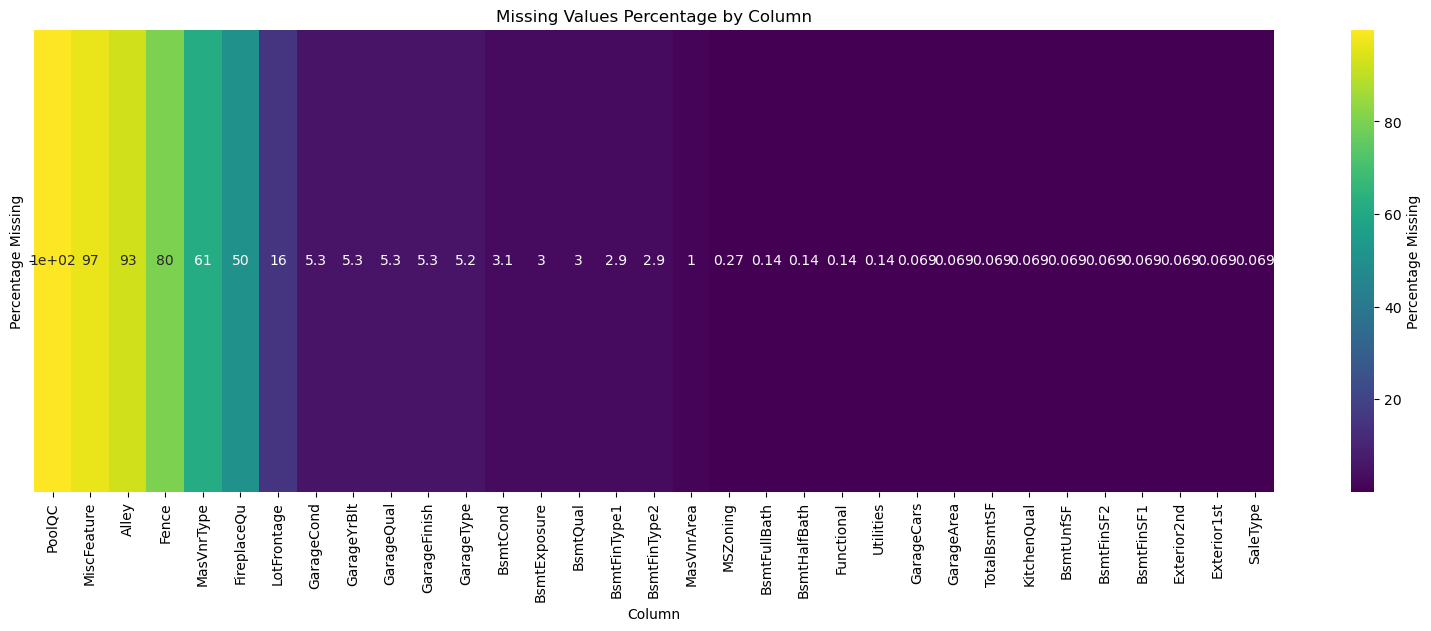

In [24]:
missing_summary_test = summarize_missing_values(test_data)
print(missing_summary_test)
plot_missing_values_summary(missing_summary_test)

In [25]:

fill_features = ['MasVnrType','Alley','Fence','PoolQC', 'FireplaceQu']
for col in fill_features:
    test_data[col] = test_data[col].fillna('NA')


Filling test missing numerical data

In [26]:
#Fill test_data null with median value
numerical_to_examine = ['LotFrontage','MasVnrArea','GarageYrBlt']
for col in numerical_to_examine:
    test_data[col] = test_data[col].fillna(test_data[col].median())
test_data[numerical_to_examine].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [27]:
basement_features = [
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'
]

for col in basement_features:
    if test_data[col].dtype == 'object':
        test_data[col] = test_data[col].fillna('NA')
    else:
        test_data[col] = test_data[col].fillna(0)


In [28]:
# Fill Garage with 'No Garage'
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'GarageCars', 'GarageArea']
for col in garage_cols:
    if test_data[col].dtype == 'object':
        test_data[col] = test_data[col].fillna('No Garage')
    else:
        test_data[col] = test_data[col].fillna(0)

In [29]:
#Filling the rest with the mode
test_data['MSZoning'] = test_data['MSZoning'].fillna(test_data['MSZoning'].mode()[0])
test_data['Utilities'] = test_data['Utilities'].fillna(test_data['Utilities'].mode()[0])
test_data['Exterior1st'] = test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['Exterior2nd'] = test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['KitchenQual'] = test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['SaleType'] = test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])
test_data['Functional'] = test_data['Functional'].fillna(test_data['Functional'].mode()[0])

In [30]:
#Drop Id and MiscFeatures
id = test_data['Id']
test_data.drop('Id' , axis =1 , inplace = True)
test_data.drop('MiscFeature', axis =1, inplace = True)
print(f"Training missing values summary:\n{summarize_missing_values(test_data)}")

Training missing values summary:
Empty DataFrame
Columns: [Index, Column, Missing Values, Percentage Missing, Dtype]
Index: []


In [31]:
#Print missing values count
print('Missing test values:', test_data.isna().sum().sum())

Missing test values: 0


# EDA – Essential Data Analysis 

Now its time to analyze and visualize the data and maybe gain some insights. We'll start with the target feature

In [32]:
#Visualize the target variable
trace = go.Box(y=train_data['SalePrice'], name='Sale Price', marker=dict(color='blue'))
layout = go.Layout(title='Sale Price Distribution', height=800, width=1000)
fig = go.Figure(data=[trace], layout=layout)
fig.show()

As we can see, our target feature ranging from 34900 to 755k but generally will be between 130k to 214k. additionaly, we can detect  many outliers at the higher range of prices, but not on the lower range.

Lets analyze how the Sale Price correlates with other features. we'll start with discrete numerical features:

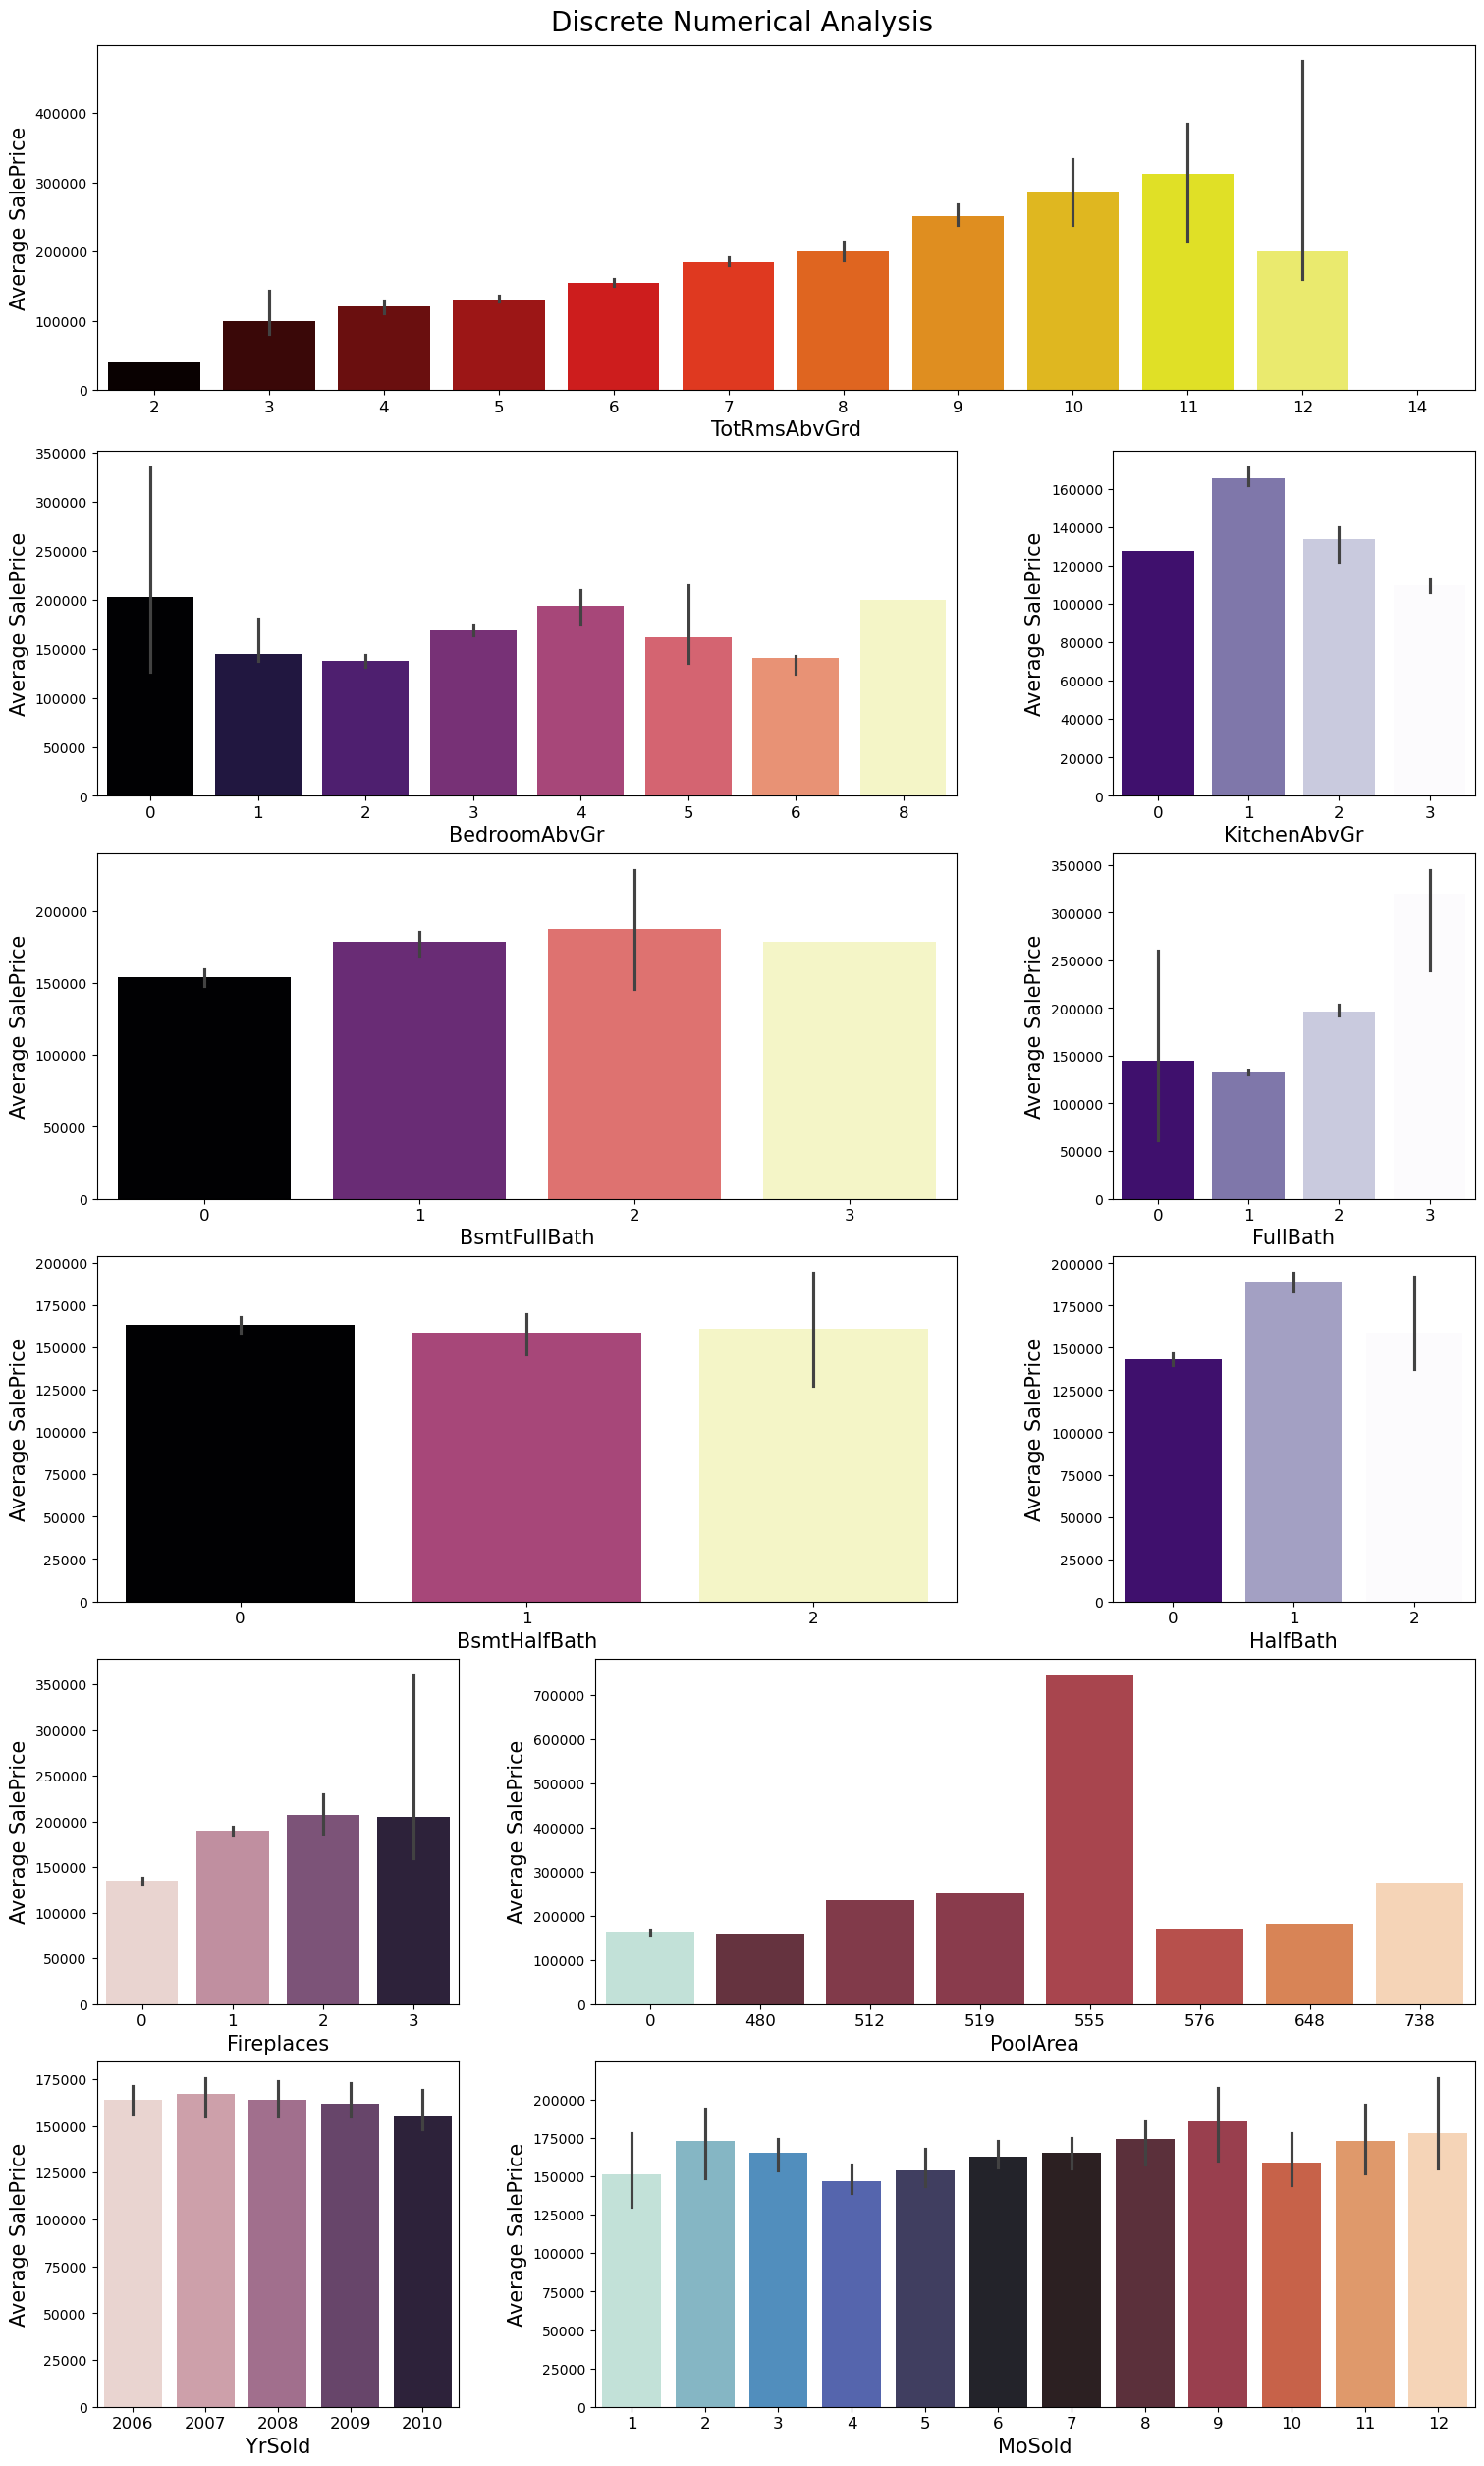

In [33]:
#Visualize Discrete Features with their average Sale Price
def plot_barplot(data, y, hue, ax, palette=None):
    sns.barplot(data=data, x=hue, y=y, hue=hue, estimator=np.median, palette=palette, ax=ax, legend=False)
    ax.set_xlabel(hue, fontsize=15)
    ax.set_ylabel(f"Average {y}", fontsize=15)
    ax.tick_params(axis='x', labelsize=12)

fig = plt.figure(constrained_layout=True, figsize=(15, 25))
gs = GridSpec(6, 3, figure=fig)

# Plotting
plot_barplot(train_data, "SalePrice", "TotRmsAbvGrd", fig.add_subplot(gs[0, :]), 'hot')
plot_barplot(train_data, "SalePrice", "BedroomAbvGr", fig.add_subplot(gs[1, :-1]), 'magma')
plot_barplot(train_data, "SalePrice", "KitchenAbvGr", fig.add_subplot(gs[1, -1]), 'Purples_r')
plot_barplot(train_data, "SalePrice", "BsmtFullBath", fig.add_subplot(gs[2, :-1]), 'magma')
plot_barplot(train_data, "SalePrice", "FullBath", fig.add_subplot(gs[2, -1]), 'Purples_r')
plot_barplot(train_data, "SalePrice", "BsmtHalfBath", fig.add_subplot(gs[3, :-1]), 'magma')
plot_barplot(train_data, "SalePrice", "HalfBath", fig.add_subplot(gs[3, -1]), 'Purples_r')
plot_barplot(train_data, "SalePrice", "Fireplaces", fig.add_subplot(gs[4, :-2]))
plot_barplot(train_data, "SalePrice", "PoolArea", fig.add_subplot(gs[4, -2:]), 'icefire')
plot_barplot(train_data, "SalePrice", "YrSold", fig.add_subplot(gs[5, :-2]))
plot_barplot(train_data, "SalePrice", "MoSold", fig.add_subplot(gs[5, -2:]), 'icefire')

plt.suptitle("Discrete Numerical Analysis", fontsize=20)
plt.show()


- Total Rooms Above Grade : As the total number of rooms increases , average price of the house increase until 11 rooms after which it sees a decrease in price.
- Bedroom Above Grade : Here we don't see a exponential curve, as for 0 bedrooms the sale price is highest followed by 4 and 8 bedrooms.The lowest is for 2 and 6 bedrooms.
- Kitchen Above Grade : Here as the number increases , price decreases.Price is highest for only one kitchent that is enough .No one demands for more than one kitchen.
- InBasemnt /Full bathroomsandBasement /Half bathrooms` we don't see a much difference.If there is no bathroom,obviously price will be less.
- Fireplaces : As fireplaces will increase in the house , sale price will also increase.
- PoolArea : Here we are talking about square feet. And from the barplot 555 sqft area is having highest sale price on average.More Area , More Sale Price.
- Year Sold : The houses in our dataset were sold from year 2006.We can see a small downward slope from 2006 to 2010.
- Month Sold : There is not much to study about the effect of Month Sold on the Sale Price, though we notice a slight decrease in price in April-May.

Now well analyze the rest of numerical features

In [34]:
numeric_data = []
for col in train_data.columns:
    if train_data[col].dtype=='int64' and col not in ['YearBuilt','YearRemodAdd','MoSold','YrSold','GarageYrBlt']:
        numeric_data.append(col)
numeric_data.insert(0, 'SalePrice')

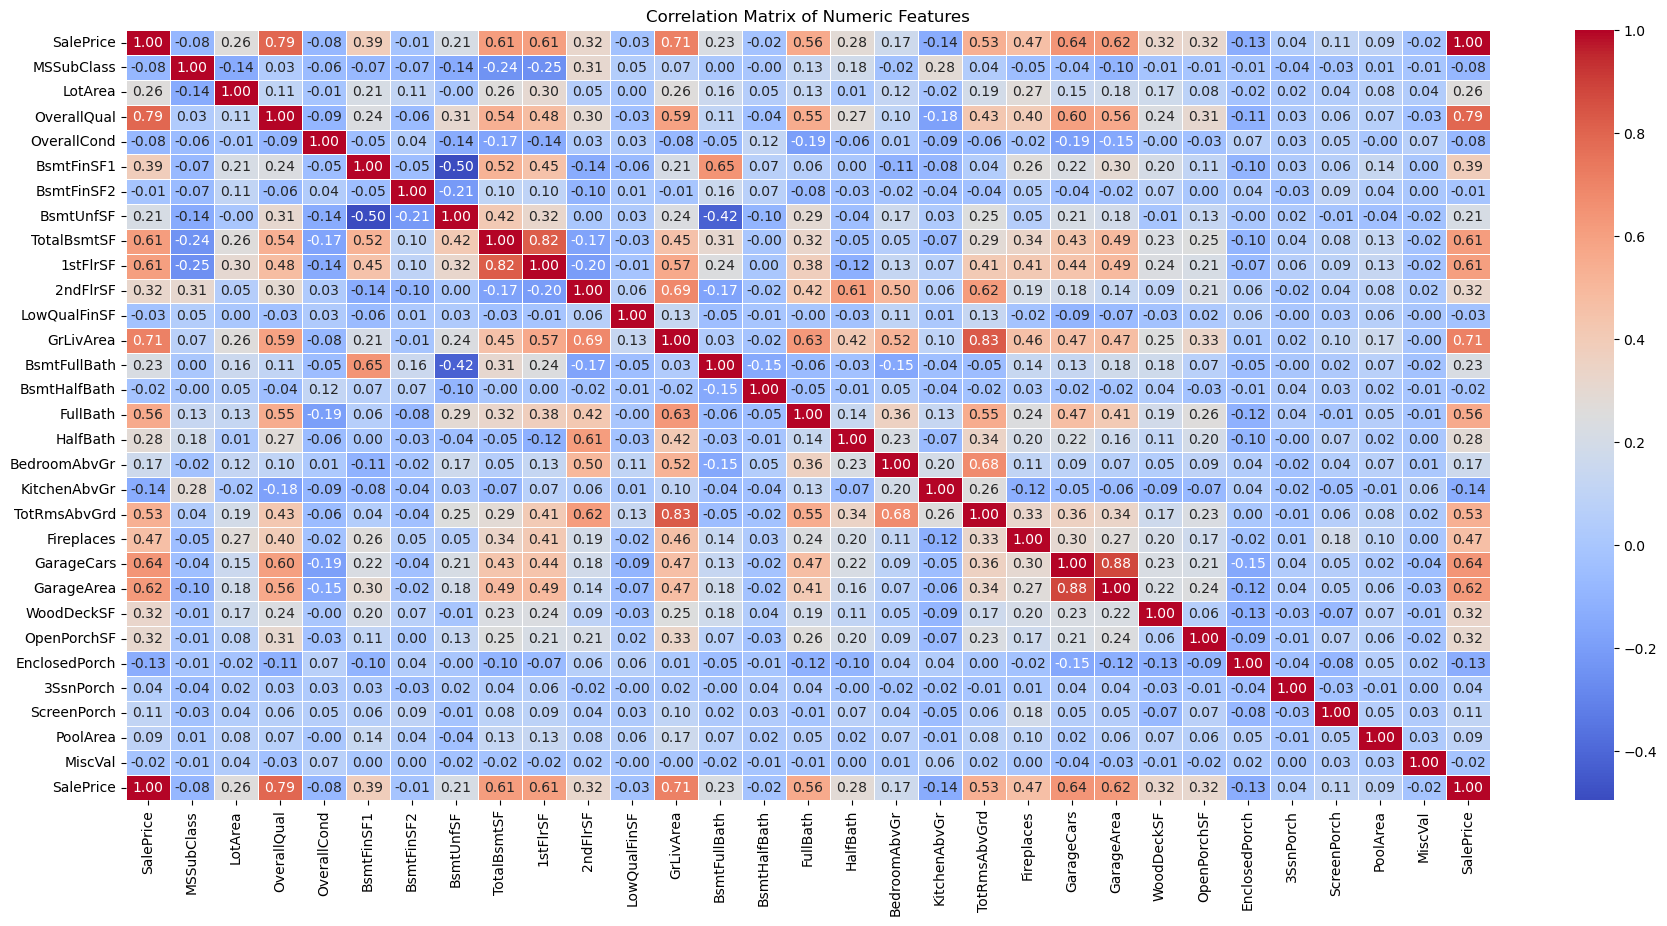

In [35]:

# Compute the correlation matrix
corr_matrix = train_data[numeric_data].corr()

# Set up the matplotlib figure
plt.figure(figsize=(22, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix of Numeric Features')
plt.show()

- The features mostly correlated to the Sale Price are: OverallQual(0.79) and GrLivarea(0.71)
- GarageArea and GarageCars has 0.62 and 0.64 correlation with SalePrice
- Total Basement surface area and first floor surface area also have a positive correlation of 0.61 with Sale Price.
- FullBath has a positive correlation of 0.56
- We have 3 negative correlations here: EnclosedPorch, KitchenAbvGround and MiscVal

## Feature Selection and Modelling
Few pipeline steps are necessary for the feature selection and modelling:
>Encode the categorical features.<br>

>Scale the data using StandardScaler.<br>

>Perform Feature Selection using RFECV.<br>

>Hyperparameter tuning.<br>

>Finally, fitting a model on the best hyperparameters.<br>


In [36]:
# Split the data into target and features
X = train_data.drop(columns=['SalePrice'])
t = train_data['SalePrice']

# Split the data into numerical and categorical features
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

categorical_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

ct = ColumnTransformer([
    ('cat', categorical_encoder, categorical_cols),
    ('num', StandardScaler(), numerical_cols),
])

X_encoded = pd.DataFrame(ct.fit_transform(X, t), columns=all_cols)

We will narrow the amount of features to use only the best features using RFECV (Recursive Feature Elimination Cross Validation)

In [37]:
#Find the best features with SgdRegressor and CV with 5 splits

sgd = SGDRegressor(random_state=42)
selector = RFECV(
    estimator=sgd,
    step=1,
    cv=5,
    n_jobs=-1,
    scoring = 'neg_mean_squared_error'
).fit(X_encoded, t)

sgd_pipe = Pipeline(steps=[
                    ('feature_selection',selector),
                    ('regression' , sgd)])

selected_features = X_encoded.columns[selector.support_]
X_selected_features = X_encoded[selected_features]
X_train, X_val, y_train, y_val = train_test_split(X_selected_features, t, test_size=0.25, random_state=42)
sgd_pipe.fit(X_train,y_train)


Pipeline(steps=[('feature_selection',
                 RFECV(cv=5, estimator=SGDRegressor(random_state=42), n_jobs=-1,
                       scoring='neg_mean_squared_error')),
                ('regression', SGDRegressor(random_state=42))])

In [38]:
X_test_encoded = pd.DataFrame(ct.transform(test_data), columns=all_cols)[selected_features]

In [39]:
# sgd_preds = sgd_pipe.predict(X_val)

# sgd_rmse = root_mean_squared_error(sgd_preds, y_val)
# sgd_r2 = sgd_pipe.score(X_val, y_val)
# selected_features_sgd = selected_features.tolist()

# print(sgd_pipe.named_steps['feature_selection'])
# print(f"Selected features: {selected_features_sgd}")
# print(f"SGDRegression R^2 score: {sgd_r2}")
# print(f"SGDRegression RMSE: {sgd_rmse}")


#### Regularization
Regularizing the data should make some improvement in the model's learning curve.
We will perform the feature selection process again based on Ridge, Lasso, and ElasticNet classifiers, and fit them to their best hyperparameters using GridSearchCV

In [40]:
# #Lasso, Ridge and ElasticNet
# lasso = Lasso(max_iter=5000)
# ridge = Ridge(max_iter=5000)
# elastic = ElasticNet(max_iter=5000)

# lasso_param_grid = {
#     'regression__alpha': [0.001, 0.01, 0.1, 1, 10],
# }

# ridge_param_grid = {
#     'regression__alpha': [0.001, 0.01, 0.1, 1, 10],
# }

# elastic_param_grid = {
#     'regression__alpha': [0.001, 0.01, 0.1, 1, 10],
#     'regression__l1_ratio': [0.4, 0.6, 0.8, 1.0],
#     'regression__tol': [0.0001, 0.001],
# }

In [41]:
# #define pipelines that handle data scaling and feature selection using different estimators
# lasso_selector = RFECV(Lasso(max_iter = 5000), cv=5, n_jobs=-1)
# ridge_selector = RFECV(Ridge(max_iter = 5000), cv=5, n_jobs=-1)
# elastic_selector = RFECV(ElasticNet(max_iter = 5000), cv=5, n_jobs=-1)

# lasso_preprocessing_pipeline = Pipeline([
#     ('feature_selection', lasso_selector )  # Initial Lasso for feature selection
# ])
# ridge_preprocessing_pipeline = Pipeline([
#     ('feature_selection', ridge_selector)  # Initial Ridge for feature selection
# ])
# elastic_preprocessing_pipeline = Pipeline([
#     ('feature_selection', elastic_selector)  # Initial ElasticNet for feature selection
# ])

In [42]:
# #define pipelines that build the models
# lasso_pipe = Pipeline([
#     ('preprocessing', lasso_preprocessing_pipeline),
#     ('regression', lasso)
# ])

# ridge_pipe = Pipeline([
#     ('preprocessing', ridge_preprocessing_pipeline),
#     ('regression', ridge)
# ])

# elastic_pipe = Pipeline([
#     ('preprocessing', elastic_preprocessing_pipeline),
#     ('regression', elastic)
# ])

In [43]:
# #perform GridSearch on each model
# lasso_grid = GridSearchCV(lasso_pipe, lasso_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=5, return_train_score=True)
# ridge_grid = GridSearchCV(ridge_pipe, ridge_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=5 , return_train_score=True)
# elastic_grid = GridSearchCV(elastic_pipe, elastic_param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=5, return_train_score=True)

In [44]:
# # fit the model
# lasso_grid.fit(X_train, y_train)
# print(f"Lasso best params: {lasso_grid.best_params_}")

In [45]:
# # fit the model
# ridge_grid.fit(X_train, y_train)
# print(f"Ridge best params: {ridge_grid.best_params_}")

In [46]:
# # fit the model
# elastic_grid.fit(X_train, y_train)
# print(f"ElasticNet best params: {elastic_grid.best_params_}")

## Evaluation

In [47]:
# lasso_best = lasso_grid.best_estimator_
# lasso_y_pred = lasso_best.predict(X_val)
# lasso_r2 = lasso_best.score(X_val, y_val)
# lasso_rmse = root_mean_squared_error(y_val, lasso_y_pred)

In [48]:
# ridge_best = ridge_grid.best_estimator_
# ridge_y_pred = ridge_best.predict(X_val)
# ridge_r2 = ridge_best.score(X_val, y_val)
# ridge_rmse = root_mean_squared_error(y_val, ridge_y_pred)

In [49]:
# elastic_best = elastic_grid.best_estimator_
# elastic_y_pred = elastic_best.predict(X_val)
# elastic_r2 = elastic_best.score(X_val, y_val)
# elastic_rmse = root_mean_squared_error(y_val, elastic_y_pred)

In [50]:
# # Create a DataFrame with the results
# results = {
#     'Model': ['SGDRegression', 'Lasso', 'Ridge', 'ElasticNet'],
#     'RMSE': [sgd_rmse, lasso_rmse, ridge_rmse, elastic_rmse],
#     'R2': [sgd_r2, lasso_r2, ridge_r2, elastic_r2]
# }
# results_df = pd.DataFrame(results)

# # Set up the plot
# fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# # Plot RMSE
# sns.barplot(x='Model', y='RMSE', data=results_df, palette='viridis', ax=axs[0])
# axs[0].set_title('Comparison of RMSE for Different Models')
# axs[0].set_xlabel('Model')
# axs[0].set_ylabel('RMSE')
# axs[0].set_ylim(0, max(results_df['RMSE']) * 1.1)  # Extend the y-axis slightly
# for index, value in enumerate(results_df['RMSE']):
#     axs[0].text(index, value + (max(results_df['RMSE']) * 0.05), f'{value:.2f}', ha='center')

# # Plot R² scores
# sns.barplot(x='Model', y='R2', data=results_df, palette='mako', ax=axs[1])
# axs[1].set_title('Comparison of R² Scores for Different Models')
# axs[1].set_xlabel('Model')
# axs[1].set_ylabel('R² Score')
# axs[1].set_ylim(min(results_df['R2']) - 0.1, 1)  # Extend the y-axis slightly
# for index, value in enumerate(results_df['R2']):
#     axs[1].text(index, value + 0.02, f'{value:.2f}', ha='center')

# # Show the plot
# plt.tight_layout()
# plt.show()

In [51]:
# # Function to extract GridSearchCV results
# def extract_results(grid_search):
#     results = grid_search.cv_results_
#     params = results['params']
#     mean_train_scores = results['mean_train_score']
#     mean_test_scores = results['mean_test_score']
#     return params, mean_train_scores, mean_test_scores

# lasso_params, lasso_train_scores, lasso_test_scores = extract_results(lasso_grid)
# ridge_params, ridge_train_scores, ridge_test_scores = extract_results(ridge_grid)
# elastic_params, elastic_train_scores, elastic_test_scores = extract_results(elastic_grid)

In [52]:

# def plot_all_results(lasso_params, lasso_train_scores, lasso_test_scores,
#                      ridge_params, ridge_train_scores, ridge_test_scores,
#                      elastic_params, elastic_train_scores, elastic_test_scores):
    
#     def plot_results(ax, params, train_scores, test_scores, param_name, title):
#         param_values = [param[param_name] for param in params]
#         ax.plot(param_values, train_scores, label='Training Loss (RMSE)', marker='o')
#         ax.plot(param_values, test_scores, label='Validation Loss (RMSE)', marker='o')
#         ax.set_xlabel(param_name.split('__')[-1])
#         ax.set_ylabel('Root Mean Squared Error')
#         ax.set_title(title)
#         ax.legend()
#         ax.grid(True)
    
#     fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    
#     # Plot Lasso results
#     plot_results(axs[0, 0], lasso_params, lasso_train_scores, lasso_test_scores, 
#                  'regression__alpha', 'Lasso')
    
#     # Plot Ridge results
#     plot_results(axs[0, 1], ridge_params, ridge_train_scores, ridge_test_scores, 
#                  'regression__alpha', 'Ridge')
    
#     # Plot ElasticNet results for alpha
#     elastic_alphas = [param for param in elastic_params if 'regression__alpha' in param]
#     elastic_train_scores_alpha = [score for param, score in zip(elastic_params, elastic_train_scores) if 'regression__alpha' in param]
#     elastic_test_scores_alpha = [score for param, score in zip(elastic_params, elastic_test_scores) if 'regression__alpha' in param]
#     plot_results(axs[1, 0], elastic_alphas, elastic_train_scores_alpha, elastic_test_scores_alpha, 
#                  'regression__alpha', 'ElasticNet (alpha)')
    
#     # Plot ElasticNet results for l1_ratio (filtered for a specific alpha, e.g., 0.1)
#     filtered_params = [param for param in elastic_params if param['regression__alpha'] == 0.1]
#     elastic_train_scores_l1 = [score for param, score in zip(elastic_params, elastic_train_scores) if param['regression__alpha'] == 0.1]
#     elastic_test_scores_l1 = [score for param, score in zip(elastic_params, elastic_test_scores) if param['regression__alpha'] == 0.1]
#     plot_results(axs[1, 1], filtered_params, elastic_train_scores_l1, elastic_test_scores_l1, 
#                  'regression__l1_ratio', 'ElasticNet (l1_ratio)')
    
#     plt.tight_layout()
#     plt.show()

# # Extracting results
# lasso_params, lasso_train_scores, lasso_test_scores = extract_results(lasso_grid)
# ridge_params, ridge_train_scores, ridge_test_scores = extract_results(ridge_grid)
# elastic_params, elastic_train_scores, elastic_test_scores = extract_results(elastic_grid)

# # Plotting all results in a single figure
# plot_all_results(lasso_params, lasso_train_scores, lasso_test_scores,
#                  ridge_params, ridge_train_scores, ridge_test_scores,
#                  elastic_params, elastic_train_scores, elastic_test_scores)


## Submission

In [53]:
# #We will use Elastic net as it has the best RMSE and R2 score
# predictions = elastic_y_pred

# # Create a DataFrame with the predictions
# predictions_df = pd.DataFrame({
#     'Actual SalePrice': y_val,
#     'Predicted SalePrice': predictions
# })
# predictions_df.head()

In [54]:
# # Create the scatter plot with Plotly
# fig = px.scatter(
#     predictions_df,
#     x='Actual SalePrice',
#     y='Predicted SalePrice',
#     trendline='ols',
#     title='Predicted vs. Actual Sale Price',
#     labels={
#         'Actual SalePrice': 'Actual Sale Price',
#         'Predicted SalePrice': 'Predicted Sale Price'
#     },
#     opacity=0.6
# )

# # Customize the layout
# fig.update_layout(
#     xaxis_title='Actual Sale Price',
#     yaxis_title='Predicted Sale Price',
#     title_x=0.5,
#     template='plotly_dark',
#     height=1000
# )

# # Show the plot
# fig.show()

In [55]:
# #Now we will create out submission_df
# X_test_preds = elastic_best.predict(X_test_encoded)

# submission_df = pd.DataFrame({
#     'Id': id,
#     'SalePrice': X_test_preds
#     })
# submission_df.head()

## Conclusions
In this notebook, we analyzed the Ames Housing dataset to build a predictive model for house prices. Through a series of methodical steps, we employed various data preprocessing techniques, feature selection methods, and machine learning algorithms to achieve a robust predictive model. Here are the key takeaways from our analysis:
#### Feature Selection:

Recursive Feature Elimination with Cross-Validation (RFECV): We used RFECV to select the most relevant features, which helped in reducing overfitting and improving the model's generalization capabilities. This step significantly reduced the dimensionality of the data while retaining the most important predictive features.
#### ElasticNet Regression
We trained an ElasticNet regression model, which combines both L1 (Lasso) and L2 (Ridge) regularization techniques. The ElasticNet model was embedded in a pipeline to streamline preprocessing and modeling tasks.
<br>We found ELasticNet to be the optimal model for us based on the RMSE and R2 graph that we used as comparison tool.
#### Hyperparameter Tuning:

Grid Search CV: We performed hyperparameter tuning using Grid Search with Cross-Validation to find the optimal parameters for the ElasticNet model. This step further improved the model's performance by fine-tuning its complexity and regularization strengths.

# Exercise 4

#### TL;DR
In this notebook, we predict house prices using 6 regression algorithms: <br>
>Locally Weighted Linear Regression (LWLR)<br>

>K-Nearest Neighbors (KNN)<br>

>Decision Trees<br>

>Support Vector Machines (SVM)<br>

>Gradient Boosting

>Random Forest Regressor

We preprocess the data, train each model, and evaluate their performance using RMSE. The SVM algorithm achieved the best results, showcasing its effectiveness in handling high-dimensional data.


In [56]:
#imports
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

* Using R² on the validation set and RMSE on the training set is a strategy that provides a balanced perspective for model evaluation, allowing us to analyze both the model's fit on the training data and its generalization to unseen data.<br>

* Overfitting Check: 
If the training RMSE is low but the validation R² is also high, it indicates a good model that not only fits the training data well but also generalizes effectively. 

In [57]:
def tune_and_evaluate(model, hyper_parameters, X_train, y_train, X_val, y_val, scoring='neg_mean_squared_error'):
    """
    Perform hyperparameter tuning using GridSearchCV and evaluate the best model.
    Returns the best RMSE and R² scores.
    """
    gs = GridSearchCV(model, hyper_parameters, scoring=scoring).fit(X_train, y_train)
    best_rmse = np.sqrt(-gs.best_score_)
    y_pred_val = gs.best_estimator_.predict(X_val)
    best_r2 = r2_score(y_val, y_pred_val)
    
    return best_rmse, best_r2, gs.best_params_, gs.best_estimator_

#### Locally Weighted Logistic Regression (LWLR)
SK-Learn does not contain a library that directly implements LWLR, therefore we will use a trustworthy implementation which was also used in class:

In [58]:
from CourseExercises.lwlr import LWLR

lwlr = LWLR(k=1)
lwlr_params = {'k': list(range(1, 10))}
arr_X_train = np.asarray(X_train)
arr_X_val = np.asarray(X_val)

# Call the modified tune_and_evaluate function
lwlr_best_rmse, lwlr_best_r2, lwlr_best_params, best_lwlr_model = tune_and_evaluate(lwlr, lwlr_params, arr_X_train, y_train, arr_X_val, y_val)
print("LWLR performance:\n")
print(f"RMSE score: {lwlr_best_rmse}")
print(f"R² score: {lwlr_best_r2}")
print(f"Best Parameters: {lwlr_best_params}")

LWLR performance:

RMSE score: 58717.92890981166
R² score: 0.8831592976066769
Best Parameters: {'k': 9}


### KNN

In [59]:
# KNeighborsRegressor
knn = KNeighborsRegressor(weights='distance')
knn_params = {'n_neighbors': list(range(1, 10))}
knn_best_rmse, knn_best_r2, knn_best_params, best_knn_model = tune_and_evaluate(knn, knn_params, X_train, y_train, X_val, y_val)
print("KNN performance:\n")
print(f"RMSE score: {knn_best_rmse}")
print(f"R² score: {knn_best_r2}")
print(f"Best Parameters: {knn_best_params}")

KNN performance:

RMSE score: 39710.342921286414
R² score: 0.7770480185300831
Best Parameters: {'n_neighbors': 7}


### Decision Trees

In [60]:
# DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt_params = {
    'max_depth': list(range(1, 10)), 
    'min_samples_split': list(range(2, 10)),
    'min_samples_leaf': list(range(1, 10))
}
dt_best_rmse, dt_best_r2, dt_best_params, best_dt_model = tune_and_evaluate(dt, dt_params, X_train, y_train, X_val, y_val)
print("Decision trees performance:\n")
print(f"RMSE score: {dt_best_rmse}")
print(f"R² score: {dt_best_r2}")
print(f"Best Parameters: {dt_best_params}")

Decision trees performance:

RMSE score: 40814.1851466088
R² score: 0.7758217002971358
Best Parameters: {'max_depth': 9, 'min_samples_leaf': 9, 'min_samples_split': 2}


### SVR - Support Vector Machines
We will use the regression version as we are predicting a continuous value.

In [61]:
# SVR
svr = SVR()
svr_params = {
    'C': [10, 100, 1000],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': [2, 3],
    'gamma': ['scale', 'auto']
}
svr_best_rmse, svr_best_r2, svr_best_params, svr_best_model = tune_and_evaluate(svr, svr_params, X_train, y_train, X_val, y_val)
print("SVR performance:\n")
print(f"RMSE score: {svr_best_rmse}")
print(f"R² score: {svr_best_r2}")
print(f"Best Parameters: {svr_best_params}")

SVR performance:

RMSE score: 37168.30331302597
R² score: 0.8626520999145755
Best Parameters: {'C': 1000, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}


## Ensembles

### Random Forest

In [62]:
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2],
}

rf_best_rmse, rf_best_r2, rf_best_params, best_rf_model = tune_and_evaluate(rf, rf_params, X_train, y_train, X_val, y_val)
print("Random Forest performance:\n")
print(f"RMSE score: {rf_best_rmse}")
print(f"R² score: {rf_best_r2}")
print(f"Best Parameters: {rf_best_params}")

Random Forest performance:

RMSE score: 33410.47062210682
R² score: 0.8856811005180387
Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 6}


### Gradient Boosting

In [63]:
gbr = GradientBoostingRegressor()
gbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
}
gbr_best_rmse, gbr_best_r2, gbr_best_params, best_gb_model = tune_and_evaluate(gbr, gbr_params, X_train, y_train, X_val, y_val)
print("Gradient Boosting performance:\n")
print(f"RMSE score: {gbr_best_rmse}")
print(f"R² score: {gbr_best_r2}")
print(f"Best Parameters: {gbr_best_params}")

Gradient Boosting performance:

RMSE score: 34925.69923293164
R² score: 0.9020946849519268
Best Parameters: {'learning_rate': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}




### Explanation of the Algorithms:<br>
**Locally Weighted Linear Regression (LWLR):**<br>

LWLR is a non-parametric algorithm that fits a linear model to a subset of the data. It gives more weight to nearby points, making it suitable for capturing local trends in the data. <br>
Performance: LWLR had the highest RMSE (58717.93) and the highest R² (0.8832) compared to the other models. This indicates that while LWLR captures the overall variance in the data well, it may not generalize as effectively, leading to higher errors.

**K-Nearest Neighbors (KNN):**<br>

KNN is a non-parametric, instance-based learning algorithm that classifies or predicts the value of a point based on the values of its nearest neighbors. <br>
Performance: KNN achieved an RMSE of 39710.34 and an R² of 0.7770. This indicates that KNN provided decent predictive accuracy but did not capture the variance in the data as effectively as other models.

**Decision Trees:**<br>

Decision Trees split the data into subsets based on feature values, creating a tree-like model of decisions. They are powerful for capturing non-linear relationships but can be prone to overfitting. <br>
Performance: Decision Trees had an RMSE of 40814.19 and an R² of 0.7758. This shows that while Decision Trees performed slightly worse than KNN in terms of error, they were close in terms of explaining the variance in the data.

**Support Vector Regression (SVR):**<br> 

SVR is a regression version of Support Vector Machines. It tries to find a function that deviates from the actual target by a value no greater than a specified margin and is as flat as possible.<br>
Performance: SVR achieved pretty low RMSE (37168.30) and a high R² (0.8627), making it the a good performing algorithm in terms of minimizing prediction error while still explaining a significant portion of the variance in the data.

#### Ensembles: 
**Random Forest:**<br> 

Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the mean prediction of the individual trees for regression tasks. The idea is to reduce overfitting by averaging multiple models, each trained on a different subset of the data. This method leverages the power of the ensemble to improve accuracy and stability, as it mitigates the variance typically observed in individual decision trees. Random Forest is robust to overfitting, especially when dealing with large datasets with numerous features.<br>
**Performance**: Random forest achieved the lowest RMSE (33410.47) and a high R² (0.8856), making it the very good-performing algorithm in terms of minimizing prediction error while still explaining a significant portion of the variance in the data.

**Gradient Boosting:**<br> 

Gradient Boosting is another powerful ensemble method, but it differs from Random Forest by focusing on building trees sequentially. Each new tree corrects the errors made by the previous ones, thereby gradually improving the model’s accuracy. The model is optimized by minimizing a loss function, making Gradient Boosting highly effective at capturing complex patterns in the data. However, this comes at the cost of being more prone to overfitting if not carefully tuned.<br>
**Performance**: Gradient Boosting achieved a relatively low RMSE (34660.58) and a the highest R² (0.9024), making it the best-performing algorithm in terms of minimizing prediction error while still explaining a significant portion of the variance in the data.

We'll visualize the comparison between the R² and RMSE of the algotihms used:

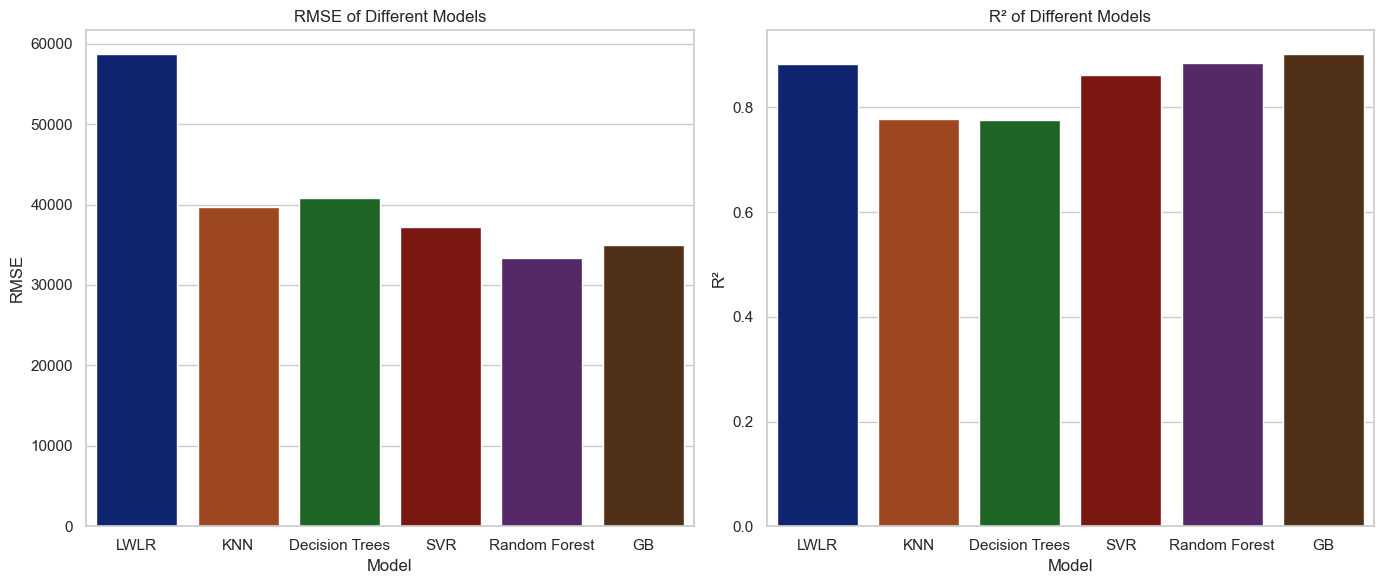

In [64]:
def visualize_comparison(models_metrics):
    """
    Visualize the comparison between different algorithms based on their RMSE and R² using Seaborn.
    
    Parameters:
    - models_metrics: A list of tuples containing (model_name, best_rmse, best_r2).
    """
    # Convert the metrics to a DataFrame for easier plotting
    df = pd.DataFrame(models_metrics, columns=['Model', 'RMSE', 'R²'])

    # Set the plot style
    sns.set(style="whitegrid")

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot RMSE
    sns.barplot(x='Model', y='RMSE', data=df, hue='Model', palette="dark", ax=axes[0])
    axes[0].set_title('RMSE of Different Models')

    # Plot R²
    sns.barplot(x='Model', y='R²', data=df, hue='Model', palette="dark", ax=axes[1])
    axes[1].set_title('R² of Different Models')

    plt.tight_layout()
    plt.show()

models_metrics = []
models_metrics.append(('LWLR', lwlr_best_rmse, lwlr_best_r2))
models_metrics.append(('KNN', knn_best_rmse, knn_best_r2))
models_metrics.append(('Decision Trees', dt_best_rmse, dt_best_r2))
models_metrics.append(('SVR', svr_best_rmse, svr_best_r2))
models_metrics.append(('Random Forest', rf_best_rmse, rf_best_r2))
models_metrics.append(('GB', gbr_best_rmse, gbr_best_r2))

visualize_comparison(models_metrics)


### Analysis of results
**LWLR:** Despite its high R² score, the large RMSE indicates that LWLR is not as reliable for this task. It might be overfitting to local variations in the data, resulting in less generalizable predictions.

**KNN:** The KNN model provided a balanced performance, with a moderate RMSE and R². However, it underperformed compared to other algorithms, particularly SVR, which suggests that KNN's simplistic approach to prediction may not be the best fit for this dataset.

**Decision Trees:** The Decision Trees algorithm had a performance close to KNN but slightly worse. This suggests that while Decision Trees can capture complex patterns, the model's depth and structure might have led to overfitting, resulting in suboptimal generalization.

**SVR:** SVR emerged as the best performer from the algorithms that are not ensembles, with the lowest RMSE,. Its R² score, although slightly lower than LWLR, still demonstrates strong predictive power, making SVR the most reliable model among the four.

**Random Forest**:  Random Forest demonstrated a slightly better RMSE compared to Gradient Boosting, but its lower R² suggests that it may not capture the underlying patterns as effectively. However, it still outperformed the non-ensemble models, indicating strong predictive capability.

**Gradient Boosting**:  Gradient Boosting had a slightly higher RMSE than Random Forest but a better R² score, indicating a better balance between capturing patterns and avoiding overfitting. Overall, both ensemble methods proved to be more effective than the other models tested.

### Tentative Conclusions
Among the six algorithms tested, Gradient Boosting achieved the best results, with a good balance between RMSE and R² scores. This makes Gradient Boosting the most effective algorithm for predicting house prices in this project so far. Its ability to capture complex patterns while maintaining strong generalization performance makes it a superior choice for this dataset.

Next, we will see how that result might change using PCA.

### PCA - Dimensionality Reduction 

In [65]:
# Initialize PCA to retain 95% of the variance
pca = PCA(n_components=0.95)

# Fit PCA on the training data and transform it
X_train_pca = pca.fit_transform(X_train)

# Transform the validation data using the same PCA object
X_val_pca = pca.transform(X_val)

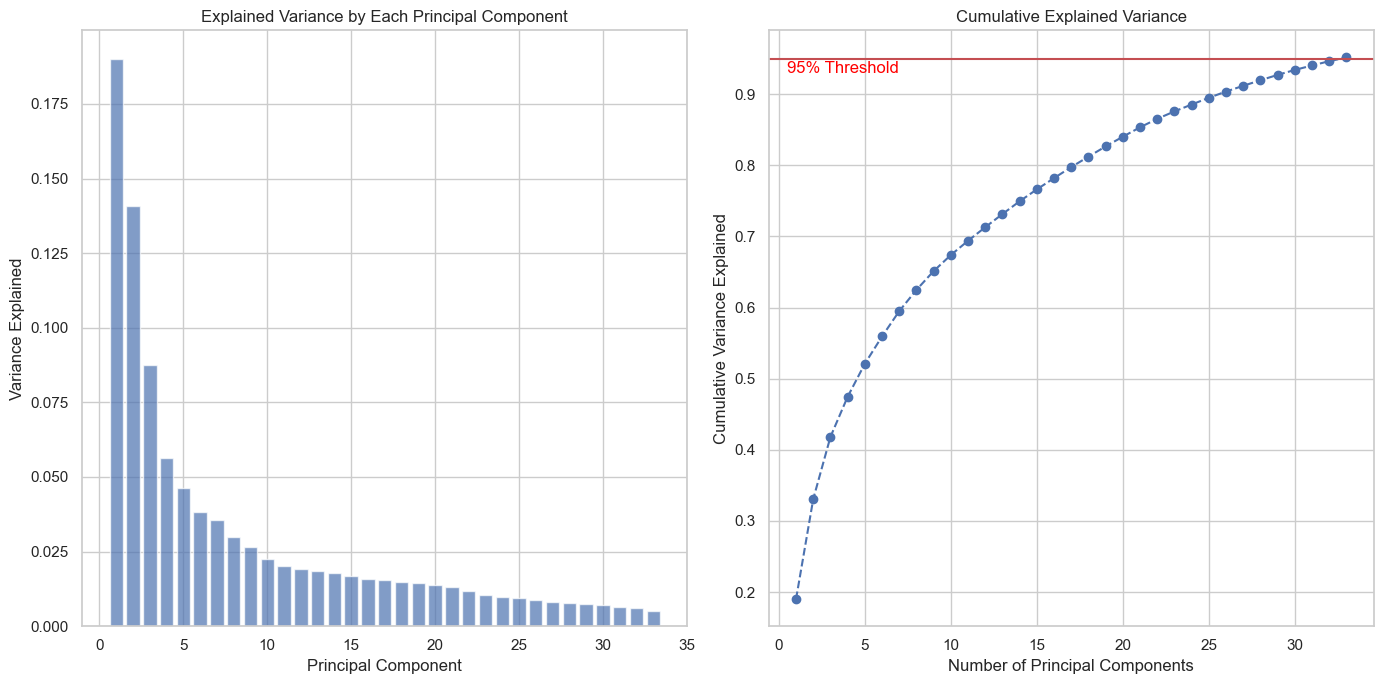

In [67]:
# Explained variance by each component
explained_variance = pca.explained_variance_ratio_
# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plotting the explained variance by each component
plt.figure(figsize=(14, 7))

# Bar plot for individual explained variance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Each Principal Component')

# Line plot for cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.93, '95% Threshold', color = 'red', fontsize=12)

plt.tight_layout()
plt.show()

* The left bar plot shows how much variance each principal component explains individually. The height of each bar represents the proportion of the total variance explained by that component.<br>

* The right graph shows the cumulative variance explained as you add more principal components. It’s useful to see how many components are needed to reach a certain level of explained variance.
The red line at 0.95 indicates the threshold where 95% of the variance is explained. This helps identify the number of components required to retain most of the information.

Let's fit the 4 algorithms again, this time on the reduced data.

In [68]:

# Initialize and train the model on the PCA-transformed training data
pca_svr = SVR(C=1000, degree=2, gamma='auto', kernel='poly')
pca_svr.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_svr = pca_svr.predict(X_val_pca)
rmse_pca_svr = root_mean_squared_error(y_val, y_pred_svr)
r2_pca_svr = r2_score(y_val, y_pred_svr)

print(f"SVR - RMSE after PCA: {rmse_pca_svr}")
print(f"SVR - R² after PCA: {r2_pca_svr}")

SVR - RMSE after PCA: 69675.85224414087
SVR - R² after PCA: 0.3069935459412476


In [69]:
# KNN with best parameters
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_val_pca)
rmse_pca_knn =  root_mean_squared_error(y_val, y_pred_knn)
r2_pca_knn = r2_score(y_val, y_pred_knn)

print(f"KNN - RMSE after PCA: {rmse_pca_knn}")
print(f"KNN - R² after PCA: {r2_pca_knn}")

KNN - RMSE after PCA: 39654.90261607031
KNN - R² after PCA: 0.7755257777007136


In [70]:
# Decision Tree with best parameters
decision_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=9, min_samples_split=2)
decision_tree.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_tree = decision_tree.predict(X_val_pca)
rmse_pca_tree =  root_mean_squared_error(y_val, y_pred_tree)
r2_pca_tree = r2_score(y_val, y_pred_tree)

print(f"Decision Tree - RMSE after PCA: {rmse_pca_tree}")
print(f"Decision Tree - R² after PCA: {r2_pca_tree}")

Decision Tree - RMSE after PCA: 47808.58129633567
Decision Tree - R² after PCA: 0.673724538276427


In [71]:
#LWLR with best parameters
lwlr = LWLR(k=9)
lwlr.fit(X_train_pca, y_train)

#Predict and evaluate
y_pred_lwlr = lwlr.predict(X_val_pca)
rmse_pca_lwlr =  root_mean_squared_error(y_val, y_pred_lwlr)
r2_pca_lwlr = r2_score(y_val, y_pred_lwlr)

print(f"LWLR - RMSE after PCA: {rmse_pca_lwlr}")
print(f"LWLR - R² after PCA: {r2_pca_lwlr}")


LWLR - RMSE after PCA: 26392.949600105734
LWLR - R² after PCA: 0.9005628754721241


In [76]:
rf = RandomForestRegressor(min_samples_leaf=1 , min_samples_split=6, random_state=42)
rf.fit(X_train_pca, y_train)

#Predict and evaluate
y_pred_rf = rf.predict(X_val_pca)
rmse_pca_rf =  root_mean_squared_error(y_val, y_pred_rf)
r2_pca_rf = r2_score(y_val, y_pred_rf)

print(f"Random Forest- RMSE after PCA: {rmse_pca_rf}")
print(f"Random Forest - R² after PCA: {r2_pca_rf}")

Random Forest- RMSE after PCA: 35467.307393651936
Random Forest - R² after PCA: 0.8204319203682056


In [77]:
gbr = GradientBoostingRegressor(learning_rate= 0.1, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
gbr.fit(X_train_pca, y_train)

#Predict and evaluate
y_pred_gbr = gbr.predict(X_val_pca)
rmse_pca_gbr =  root_mean_squared_error(y_val, y_pred_gbr)
r2_pca_gbr = r2_score(y_val, y_pred_gbr)

print(f"Gradient Boosting - RMSE after PCA: {rmse_pca_gbr}")
print(f"Gradient Boosting - R² after PCA: {r2_pca_gbr}")

Gradient Boosting - RMSE after PCA: 31799.376721059063
Gradient Boosting - R² after PCA: 0.8556522842471657


### Visualizing the Differences : Before and after PCA

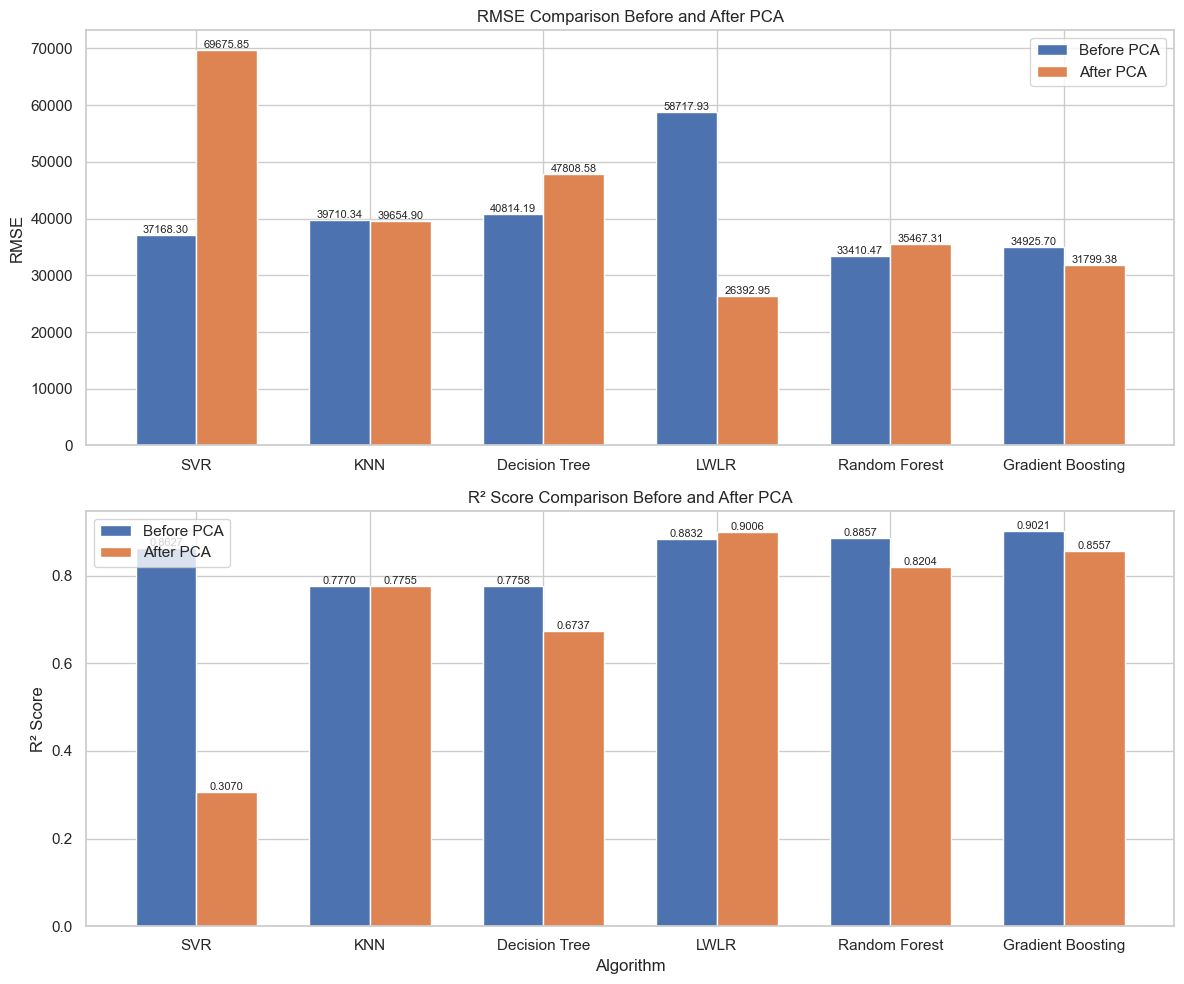

In [81]:
# Data for the algorithms before PCA
algorithms = ['SVR', 'KNN', 'Decision Tree', 'LWLR', 'Random Forest' , 'Gradient Boosting']
rmse_before = [svr_best_rmse, knn_best_rmse , dt_best_rmse, lwlr_best_rmse, rf_best_rmse , gbr_best_rmse]
r2_before = [svr_best_r2, knn_best_r2, dt_best_r2, lwlr_best_r2, rf_best_r2, gbr_best_r2]

# Data for the algorithms after PCA
rmse_after = [rmse_pca_svr, rmse_pca_knn, rmse_pca_tree, rmse_pca_lwlr, rmse_pca_rf, rmse_pca_gbr ]
r2_after = [r2_pca_svr, r2_pca_knn, r2_pca_tree, r2_pca_lwlr, r2_pca_rf, r2_pca_gbr]

# Set up the bar width and positions
bar_width = 0.35
index = np.arange(len(algorithms))

# Plotting RMSE comparison
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# RMSE Bar plots
bars_before = ax[0].bar(index, rmse_before, bar_width, label='Before PCA')
bars_after = ax[0].bar(index + bar_width, rmse_after, bar_width, label='After PCA')

# Add values above RMSE bars
for bar in bars_before:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

for bar in bars_after:
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

# Add labels and title to the RMSE plot
ax[0].set_ylabel('RMSE')
ax[0].set_title('RMSE Comparison Before and After PCA')
ax[0].set_xticks(index + bar_width / 2)
ax[0].set_xticklabels(algorithms)
ax[0].legend()

# R² Bar plots
bars_before = ax[1].bar(index, r2_before, bar_width, label='Before PCA')
bars_after = ax[1].bar(index + bar_width, r2_after, bar_width, label='After PCA')

# Add values above R² bars
for bar in bars_before:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom', fontsize=8)

for bar in bars_after:
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.4f}', ha='center', va='bottom', fontsize=8)

# Add labels and title to the R² plot
ax[1].set_xlabel('Algorithm')
ax[1].set_ylabel('R² Score')
ax[1].set_title('R² Score Comparison Before and After PCA')
ax[1].set_xticks(index + bar_width / 2)
ax[1].set_xticklabels(algorithms)
ax[1].legend()

# Display the plots
plt.tight_layout()
plt.show()

### Analysis : Before and After PCA

**1. Locally Weighted Linear Regression (LWLR)**

Before PCA:<br>
* RMSE: 58717.93<br>
* R²: 0.8832<br>

After PCA:<br>
* RMSE: 26392.95<br>
* R²: 0.9006<br>

Analysis:

* **Improvement:** The RMSE significantly decreased from 58717.93 to 26392.95, indicating that the prediction error was greatly reduced after PCA. The R² score also slightly improved, suggesting that the model is now explaining more variance in the data.<br>
* **Insight:** PCA has had a very positive impact on the LWLR model, reducing complexity and improving predictive accuracy.<br>

**2. Support Vector Regression (SVR)**<br>

Before PCA:<br>
* RMSE: 37168.30<br>
* R²: 0.8627<br>

After PCA:<br>
* RMSE: 69675.85<br>
* R²: 0.3070<br>

Analysis:

* **Decline:** The RMSE increased dramatically from 37168.30 to 69675.85, while the R² score dropped sharply from 0.8627 to 0.3070. This suggests that PCA significantly reduced the performance of the SVR model.<br>
* **Insight:** The reduction in dimensionality through PCA might have removed important features or altered the data distribution in a way that negatively impacted the SVR model's ability to capture the underlying patterns in the data.<br>

**3. K-Nearest Neighbors (KNN)**<br>

Before PCA:<br>
* RMSE: 39710.34<br>
* R²: 0.7770

After PCA:<br>
* RMSE: 39654.90<br>
* R²: 0.7755<br>

Analysis:

* **Minimal Change:** The RMSE and R² scores remained nearly the same after applying PCA. The RMSE decreased slightly, but the R² score also showed a marginal decrease.<br>
* **Insight:** For KNN, PCA had little to no impact. This might be because KNN is less sensitive to dimensionality reduction, particularly when the original dataset already has an optimal feature set.<br>

**4. Decision Tree**<br>

Before PCA:<br>
* RMSE: 40814.19<br>
* R²: 0.7758<br>

After PCA:<br>
* RMSE: 47808.58<br>
* R²: 0.6737<br>

Analysis:

* **Decline:** The RMSE increased from 40814.19 to 47808.58, and the R² score decreased from 0.7758 to 0.6737. This indicates that the model's ability to predict and explain variance in the data was reduced after PCA.<br>
* **Insight:** Decision Trees often rely on the full set of features to make optimal splits. The application of PCA likely removed or altered some important features, resulting in a loss of performance.

**5. Random Forest** <br>
Before PCA: <br>
* RMSE: 33410.70  <br>
* R²: 0.8857<br>

After PCA:<br>
* RMSE: 35467.31<br>
* R²: 0.8204<br>

Analysis:

* **Change in RMSE:** The RMSE increased from 33410.70 to 35467.31 after PCA. This indicates that the predictive accuracy of the Random Forest model slightly decreased after applying PCA, resulting in a higher error.<br>
* **Change in R²:** The R² dropped from 0.8857 to 0.8204 after PCA. This suggests that the model’s ability to explain the variance in the data was reduced, indicating that PCA might have removed some features important to the model’s predictive power.
* **Insight:** PCA had a negative impact on the Random Forest model. While it might have helped reduce overfitting by removing less important features, it also seems to have removed valuable information that the Random Forest model was using, leading to slightly worse performance.

**6. Gradient Boosting**<br>
Before PCA:<br>
* RMSE: 34925.70<br>
* R²: 0.9021 <br>

After PCA:<br>
* RMSE: 31799.38 <br>
* R²: 0.8557 <br>

Analysis:

* **Change in RMSE:** The RMSE decreased from 34925.70 to 31799.38 after PCA. This decrease indicates that the Gradient Boosting model became more accurate after PCA, with a lower prediction error.<br>
* **Change in R²:** The R² decreased from 0.9021 to 0.8557 after PCA. Although there was a slight drop in the R², the model still explains a substantial amount of variance in the data. The decrease is relatively small compared to the improvement in RMSE.<br>
* **Insight:** PCA had a positive impact on the Gradient Boosting model. By focusing on the most important features, PCA helped the model become more efficient, reducing the error while still retaining a high level of predictive power.<br>

## Model Selection and Submission

In [73]:
#Gradient Boosting
gbr_pred = best_gb_model.predict(X_test_encoded)
# #Random Forest
# rf_pred = best_rf_model.predict(X_test_encoded)
# #SVR
# svr_pred = svr_best_model.predict(X_test_encoded)

submission_gbr = pd.DataFrame({
    'Id': id,
    'SalePrice': gbr_pred
    })
submission_gbr.head()

,Id,SalePrice
0,1461,133592.365086
1,1462,158567.071671
2,1463,177880.626610
3,1464,185261.297253
4,1465,192534.794544


In [83]:
#Apply PCA reduction on the test data
X_test_pca = pca.transform(X_test_encoded)

#Gradient Boosting (Post-PCA)
gbr_pca_pred = gbr.predict(X_test_pca)

submission_gbr_pca = pd.DataFrame({
    'Id': id,
    'SalePrice': gbr_pred
    })
submission_gbr_pca.head()

,Id,SalePrice
0,1461,133592.365086
1,1462,158567.071671
2,1463,177880.626610
3,1464,185261.297253
4,1465,192534.794544


In [74]:
# submission_gbr.to_csv('submission_18.csv', index=False)

![Screenshot 2024-08-10 153647.png](<attachment:Screenshot 2024-08-10 153647.png>)
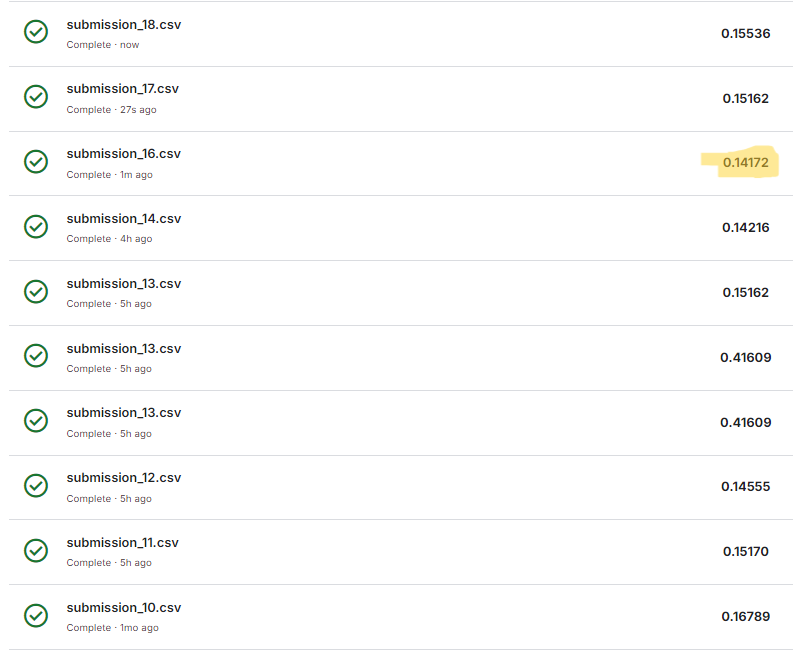

# Conclusions

This assignment aimed to predict house prices using various machine learning models, with a focus on evaluating the impact of Principal Component Analysis (PCA) as a dimensionality reduction technique. The models explored included Locally Weighted Linear Regression (LWLR), Support Vector Regression (SVR), K-Nearest Neighbors (KNN), Decision Trees, and we chose to apply 2 additional ensemble methods: Random Forest, and Gradient Boosting. The analysis was conducted by comparing the models' performance before and after applying PCA, with metrics such as Root Mean Squared Error (RMSE) and R² scores being the key indicators of performance.

**PCA Impact:**
 PCA had mixed effects on the models, significantly improving the performance of LWLR and Gradient Boosting, while leading to performance declines in SVR and Decision Trees. KNN remained largely unaffected, and Random Forest saw a slight decrease in performance post-PCA.

**Best Performing Model:**
 LWLR (Post-PCA) emerged as the best overall model, achieving a significant reduction in RMSE and an increase in R², indicating enhanced accuracy and better variance explanation. Gradient Boosting (Post-PCA) also performed well, particularly with a notable reduction in RMSE, making it another strong contender.

## References

During our research, we took inspiration from the lab exercises and lecture presentations available on Afeka College of Engineering organizational moodle, as well as some public notebooks available on Kaggle.<br>We referenced 'Medium' technical articles about Data science, and used python's libraries Docs and GPT's for technical aspect.

Code documentaries we used:<br>
Scikit-Learn GridSearchCV documentary: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html<br>
Plotly visualization tool: https://plotly.com/python/
<br>RFECV: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
<br>OrdinalEncoder: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
<br>ColumnTransformer: https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
<br>ElasticNet: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html
